**Divyansh Kaushik**

**102083048**

**4CO2**

**Project 1: Prediction in time series dataset**

In [188]:
# Import the necessary libraries
import pandas as pd, numpy as np

In [189]:
# Import the dataset
df = pd.read_excel('/content/drive/MyDrive/DATASET.xlsx')
df

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


**Dataset Preprocessing**

In [190]:
#Replacing empty cells with zero
df.fillna(0, inplace=True)

In [191]:
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])

In [192]:
# Naming sections
j = 0
for i in range(100):
  df.iloc[j:j + 10, 0] = df.iloc[j, 0]
  j += 10

In [193]:
# Test dataset means for 10th year
df_test = df.loc[df['year'] == 10]
df_test

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [194]:
# Rename Section column to Section_num
df.columns = df.columns.str.replace('Unnamed: 0', 'Section_num')
df_test.columns = df_test.columns.str.replace('Unnamed: 0', 'Section_num')
df

,Section_num,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [195]:
# Printing first 30 rows of preprocessed dataset
df.head(30)

,Section_num,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.810
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.860
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.890
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.920
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960


**Model Implementation**

In [196]:
# Import the Random Forest Algorithm from the scikit-learn and also other
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [208]:
# Call the regressor constructor
regressor = RandomForestRegressor(n_estimators = 155, random_state = 0, max_depth = 2)

In [209]:
# Make the expected list of all the important parameters
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}

In [200]:
# Use the GridSearchCV model selection for cross-validation
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(regressor,parameters,cv=5)

In [210]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [ ]:
#Applying Random forest regressor model with GridSearchCV for each section by taking para 1-8 as input and para 9-13 as target and predicting on year 10 of each section
RMSE = []
N = 0
index = 0
for j in [10, 11, 12, 13, 14]:
  ans = 0
  count = 0
  for i in range(0, 1000, 10):
    # Training dataset
    xtrain = df.iloc[i:i+9, 1:10]
    ytrain = df.iloc[i:i+9, j]

    # Finding best parameters for Random Forest Regressor
    cv.fit(xtrain, ytrain)
    Dict = cv.best_params_  # best_params_ return dictinary of best parameters
    reg = RandomForestRegressor(n_estimators = Dict['n_estimators'], max_depth = Dict['max_depth'])

    # Test dataset
    xtest = df.iloc[i+9, 1:10].to_numpy()
    ytest = df.iloc[i+9, j]

    # Applying Random Forest Regressor
    reg.fit(xtrain, ytrain)
    ypred = reg.predict(xtest.reshape(1,-1))[0]
    predicted[names[index]].append(ypred)
    ans += (ytest - ypred)**2
    count += 1
    N += 1
  RMSE.append(ans)
  index += 1

In [217]:
df_predicted = pd.DataFrame.from_dict(predicted)
df_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.385806,53.486699,34.935484,7.199800,1.880832
1,55.392292,26.956608,0.890323,7.493011,0.786084
2,64.207484,0.000000,0.000000,10.936022,1.352982
3,16.070341,51.945487,56.015376,6.779355,1.790719
4,0.000000,246.647957,33.818495,5.785653,1.666654
...,...,...,...,...,...
95,157.673183,177.218432,8.503226,7.131720,1.487886
96,4.134194,56.531108,21.020799,11.651613,1.062924
97,91.428473,56.362710,11.555269,10.709140,0.879467
98,100.650484,208.155127,126.038710,10.550108,1.998740


In [ ]:
#RMSE for each column
for i in RMSE:
  print((i/count)**0.5)

**RMSE Calculation**

In [226]:
#Total RMSE
print('RMSE: ',(sum(RMSE)/N)**0.5)

RMSE: 61.325671264854372


**Result Plots**

In [218]:
# Selecting random 25 rows
import random
ind = []
for i in range(25):
  ind.append(random.randint(0,100))
ind

[72,
 90,
 79,
 17,
 3,
 65,
 30,
 9,
 79,
 36,
 56,
 86,
 51,
 91,
 26,
 74,
 53,
 10,
 7,
 19,
 7,
 17,
 5,
 92,
 92]

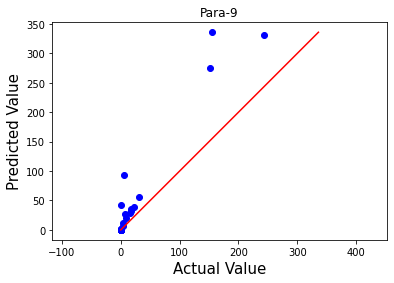

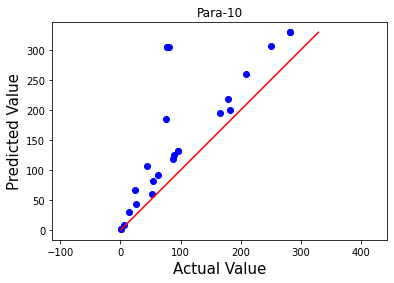

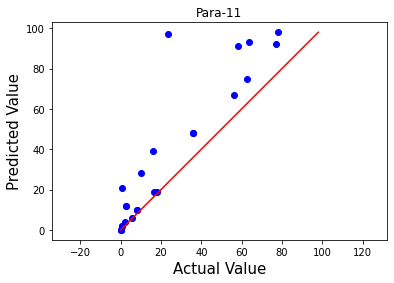

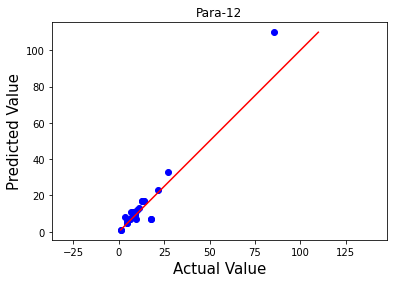

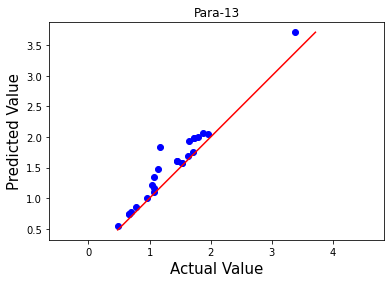

In [221]:
# Scatter plot for random 25 rows out of 100 for each target column
for i in range(5):
  plt.figure(figsize=(6,4))
  true_value = df_predicted.iloc[ind, i]
  predicted_value = df_test.iloc[ind, i + 10]
  plt.scatter(true_value, predicted_value, c='blue')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'r-')
  plt.title(names[i])
  plt.xlabel('Actual Value', fontsize=15)
  plt.ylabel('Predicted Value', fontsize=15)
  plt.axis('equal')
  plt.show()

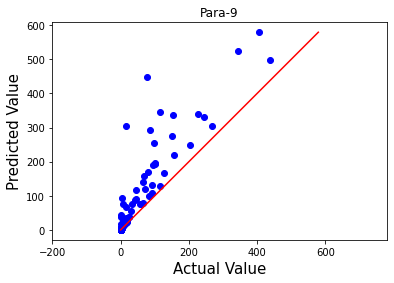

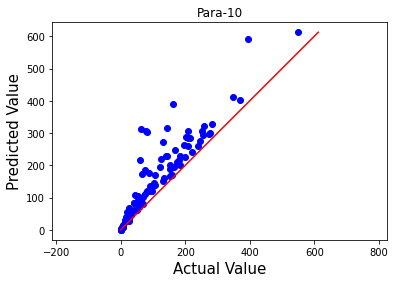

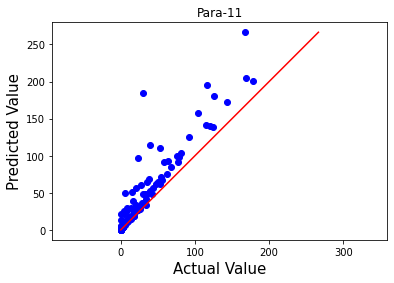

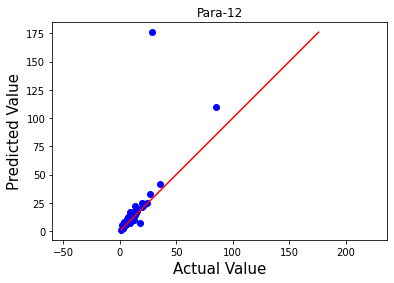

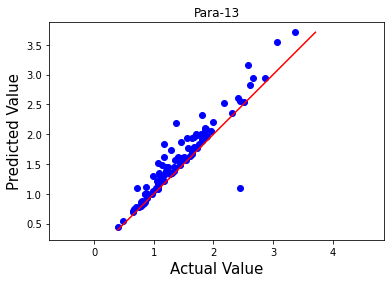

In [223]:
# Scatter plot for all "year = 10" rows for each target column
for i in range(5):
  plt.figure(figsize=(6,4))
  true_value = df_predicted.iloc[:, i]
  predicted_value = df_test.iloc[:, i + 10]
  plt.scatter(true_value, predicted_value, c='blue')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'r-')
  plt.title(names[i])
  plt.xlabel('Actual Value', fontsize=15)
  plt.ylabel('Predicted Value', fontsize=15)
  plt.axis('equal')
  plt.show()